In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from dateutil import parser

In [2]:
dataset = pd.read_csv("appdata10.csv")


In [3]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
dataset.describe() # basic statistical data 

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dataset["hour"] = dataset.hour.str.slice(1,3).astype(int)# taking hour convert to str to slice it by taking the 1 and 2 positioned values later convert to int. In python the last index dont count hence 3

In [5]:
dataset2 = dataset.copy().drop(columns =['user', 'screen_list', 'first_open', 'enrolled_date','enrolled']) # making a copy of the original datset and dropping unwanted columns 

In [6]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,02:00:00,23,15,0,0,0
1,6,01:00:00,24,13,0,0,0
2,1,19:00:00,23,3,0,1,1
3,4,16:00:00,28,40,0,0,0
4,1,18:00:00,31,32,0,0,1


In [7]:
plt.suptitle('Histograms of Numercial Column', fontsize = 20)

Text(0.5, 0.98, 'Histograms of Numercial Column')

<Figure size 432x288 with 0 Axes>

In [8]:
dataset2.shape


(50000, 7)

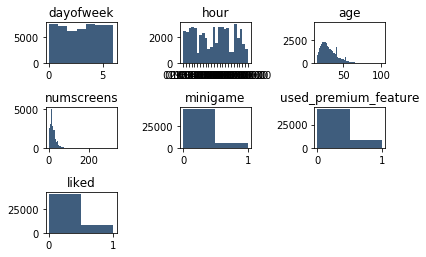

In [9]:
for i in range(1, dataset2.shape[1]+ 1):   # range(min_value, max_value)
    plt.subplot(3,3,i) #number of dimensions to fill the grid of graphs
    f = plt.gca()# gca cleanse up everything 
    f.set_title(dataset2.columns.values[i - 1]) # to get all the columns name
    vals = np.size(dataset2.iloc[:, i - 1].unique()) # get all unique coulumn names
    
    plt.hist(dataset2.iloc[:, i-1], bins = vals, color='#3F5D7D') 
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

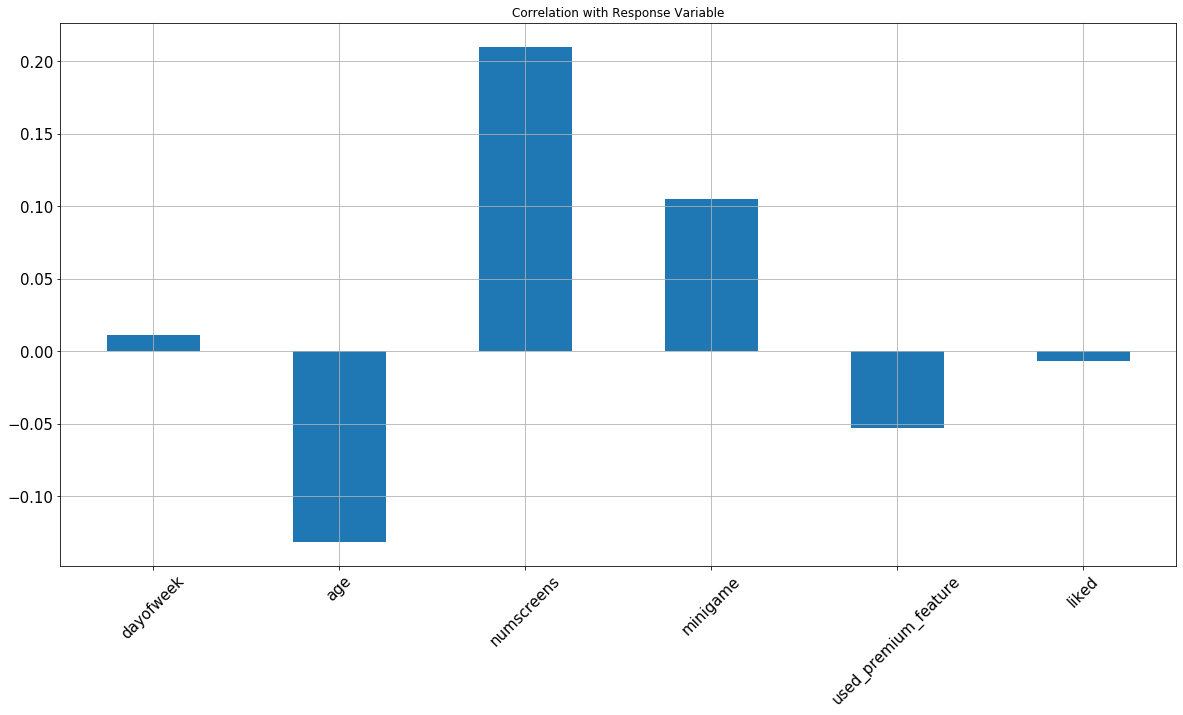

In [10]:
#ploting a bar graph to find any correlation of all the main variables with the response variable -> enrolled 
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (20,10),
                                            title = "Correlation with Response Variable",
                                            fontsize = 15, rot = 45, # rot -> rotation labels on the X asis is angles to 45 degrees to make it easy to read
                                            grid = True)

In [ ]:
# We find that the users who used the premium are less likely to enroll to the paid verions lol
# numscreens have high correlation to the enrolled variable

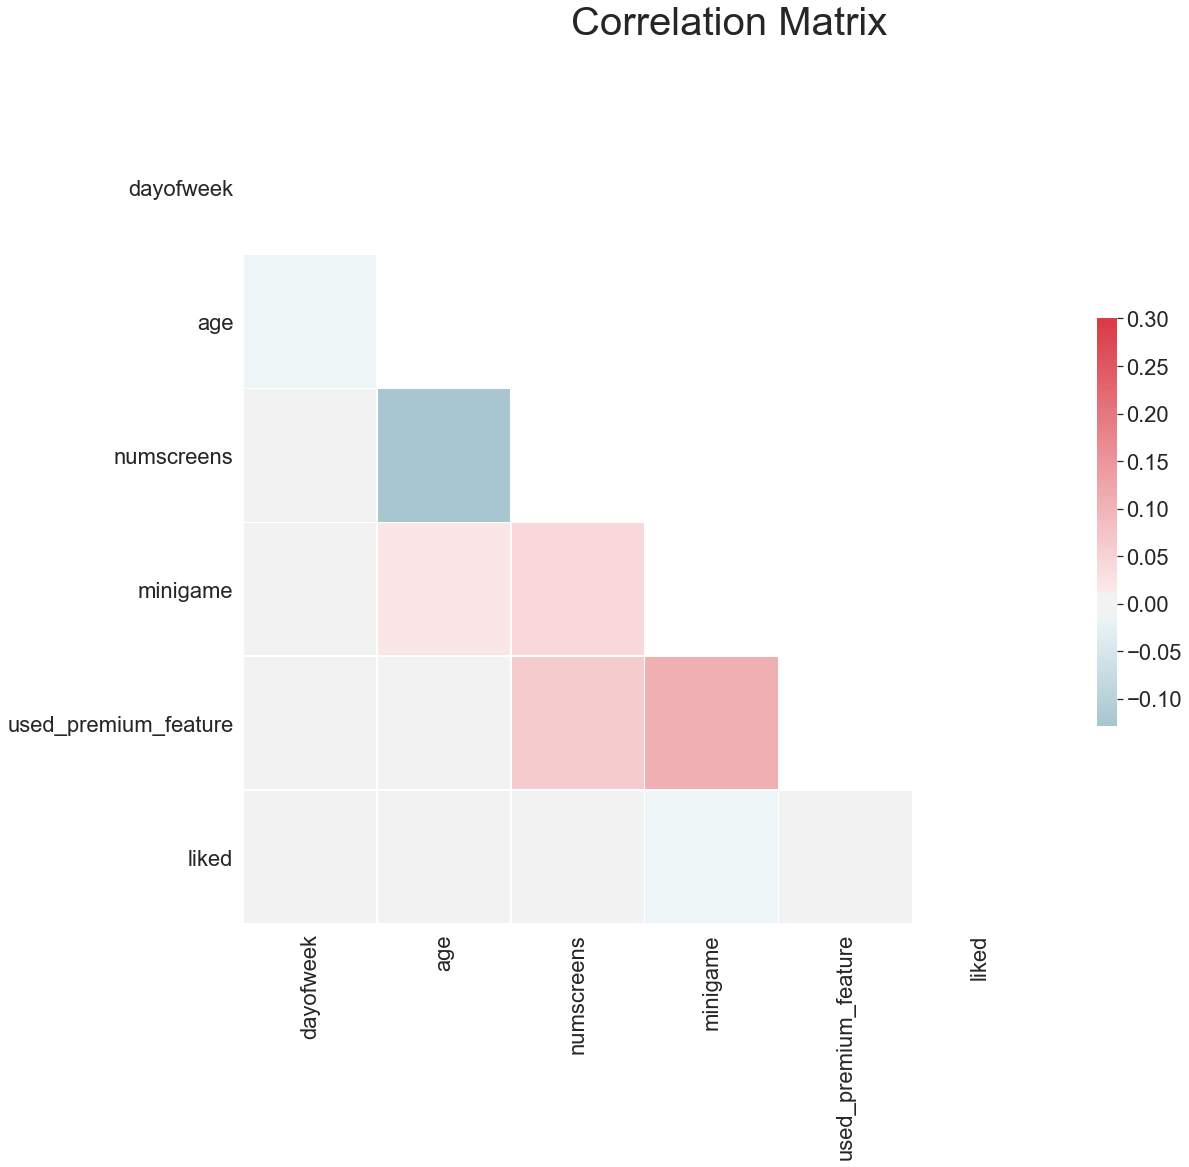

In [11]:
sns.set(style="white", font_scale=2) # background

# Compute the correlation matrix
corr = dataset2.corr() # passes the arrays of the correlation found to corr

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool) # the values of the array in corr is converterd to bool type passed to mask
mask[np.triu_indices_from(mask)] = True # sets how the triangle formed by the matrix is displayed triu for upper triangle(normal shape of a right angle triangle) triu for inverted shape

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15)) # set fig size and subplots
f.suptitle("Correlation Matrix", fontsize = 40)# title 

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) # colors for the matrix

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# we are ploting this to find out we any variable dependent to any other feature. If any variable is, it should not be used to in the model as it violates the modell building foundations. When building a modle we must used varibales that are independent 

In [ ]:
# We dont see and strong dependance, hence we assume all are independant 

In [12]:
dataset.dtypes # to see the data types of every variable in the set 


user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [13]:
dataset["first_open"] = [parser.parse(row_date)for row_date in dataset["first_open"]]

In [15]:
dataset["enrolled_date"] = [parser.parse(row_date)if isinstance (row_date, str)else row_date for row_date in dataset['enrolled_date']]

In [16]:
dataset.dtypes


user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                            object
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [17]:
#the datatype is changed from object to datetime64 for first_open and enrolled_date

In [19]:
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

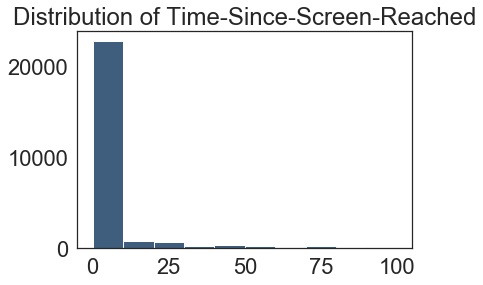

In [20]:
plt.hist(dataset["difference"].dropna(), color = "#3F5D7D", range = [0,100])
plt.title("Distribution of Time-Since-Screen-Reached")
plt.show()

In [24]:
dataset

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,0
49997,302367,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


In [21]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0


In [23]:
dataset = dataset.drop(columns = ['enrolled_date', 'difference', 'first_open'])

In [25]:
top_screen = pd.read_csv('top_screens.csv').top_screens.values

In [27]:
dataset['screen_list'] = dataset.screen_list.astype(str) + ','
for sc in top_screen:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset["screen_list"] = dataset.screen_list.str.replace(sc+ ',',"")

In [28]:
dataset["Other "] = dataset.screen_list.str.count(",")

In [29]:
dataset = dataset.drop(columns = ["screen_list"])

In [30]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]

In [31]:
dataset["SavingsCount"] = dataset[savings_screens].sum(axis = 1)

In [32]:
dataset = dataset.drop(columns = savings_screens)

In [33]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)


In [34]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,02:00:00,23,15,0,0,0,0,0,...,0,0,0,0,0,8,0,0,0,1
1,333588,6,01:00:00,24,13,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,1
2,254414,1,19:00:00,23,3,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,234192,4,16:00:00,28,40,0,0,1,0,1,...,0,0,0,0,0,7,0,3,0,1
4,51549,1,18:00:00,31,32,0,0,1,1,0,...,0,0,0,0,0,11,0,2,0,1


In [36]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,0.293660,...,0.014220,0.013340,0.013400,0.008200,0.007580,7.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,0.455443,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000,5.00000,3.000000,3.000000


In [37]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other ',
       'SavingsCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [38]:
dataset.to_csv('new_appdata10.csv', index = False)